In [153]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [154]:
import os
import pandas as pd
import numpy as np

In [155]:
# Specify the folder path where the CSV files are located...
path1 = "I:\CLASS Stuffs\Term 2\BDM 3014\Project\CSVs\Batch1"
# Create an empty list to store the DataFrames
dataframes1 = []
# Iterate through all files in the folder
for file_name in os.listdir(path1):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path1 = os.path.join(path1, file_name)
        df1= pd.read_csv(file_path1,low_memory=False)
        dataframes1.append(df1)
# Concatenate all DataFrames into a single DataFrame
combine1 = pd.concat(dataframes1, ignore_index=True)
#printing the shape.
print(combine1.shape)

(197132, 75)


In [156]:
# Specify the folder path where the CSV files are located
path2 = "I:\CLASS Stuffs\Term 2\BDM 3014\Project\CSVs\Batch2"
# Create an empty list to store the DataFrames
dataframes2 = []
# Iterate through all files in the folder
for file_name in os.listdir(path2):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path2 = os.path.join(path2, file_name)
        df2= pd.read_csv(file_path2,low_memory=False)
        dataframes2.append(df2)
# Concatenate all DataFrames into a single DataFrame
combine2 = pd.concat(dataframes2, ignore_index=True)
print(combine2.shape)

(388021, 75)


In [157]:
# Concatenate all combined dataframes into a single final combined DataFrame.
FinalDFList=[]
FinalDFList.append(combine1)
#FinalDFList.append(combine2)
FinalCombo = pd.concat(FinalDFList, ignore_index=True)
print(FinalCombo.shape)
#print(FinalCombo[['host_location']].head(50))

(197132, 75)


In [158]:
#Making CSV from the final dataset
subset_df = FinalCombo.tail(80000)
print(subset_df.shape)

(80000, 75)


In [159]:
#dropping irrelavant columns
subset_df.drop(columns=['id', 'last_scraped', 'listing_url','scrape_id','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','bathrooms','bathrooms_text','amenities','calendar_updated','calendar_last_scraped','first_review','last_review','license'],inplace=True)

#remove records having blank host locations
subset_df.dropna(subset=['host_location'], inplace=True)

#check how many Null values we have in each feature
for col in subset_df.columns:
    print(col + ', Number of Missing Values:', len(subset_df[col][subset_df[col].isnull()]))

#fill missing values with mode values of fatures
mode_values = subset_df.mode().iloc[0]
columns_to_fill = subset_df.columns
subset_df[columns_to_fill] = subset_df[columns_to_fill].fillna(mode_values)

print("\n\n")
for col in subset_df.columns:
    print(col + ', Number of Missing Values:', len(subset_df[col][subset_df[col].isnull()]))


C:\Users\patel\AppData\Local\Temp\ipykernel_17888\4179539306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.drop(columns=['id', 'last_scraped', 'listing_url','scrape_id','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','bathrooms','bathrooms_text','amenities','calendar_updated','calendar_last_scraped','first_review','last_review','license'],inplace=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_17888\4179539306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

host_location, Number of Missing Values: 0
host_response_time, Number of Missing Values: 10355
host_response_rate, Number of Missing Values: 10355
host_acceptance_rate, Number of Missing Values: 6611
host_is_superhost, Number of Missing Values: 9138
host_listings_count, Number of Missing Values: 0
host_total_listings_count, Number of Missing Values: 0
host_has_profile_pic, Number of Missing Values: 0
host_identity_verified, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 13563
beds, Number of Missing Values: 674
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
maximum_nights, Number of Missing Values: 0
minimum_minimum_nights, Number of Missing Values: 14
maximum_minimum_nights, Number of Missing Values: 14
minimum_maximum_nights, Number of Missing Values: 14
maximum_maximum_nights, Number of Missing Values: 14
minimum

C:\Users\patel\AppData\Local\Temp\ipykernel_17888\4179539306.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_fill] = subset_df[columns_to_fill].fillna(mode_values)


In [160]:
#checking for feature types.
for col in subset_df.columns:
    data_type = subset_df[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

The data type of column 'host_location' is object.
The data type of column 'host_response_time' is object.
The data type of column 'host_response_rate' is object.
The data type of column 'host_acceptance_rate' is object.
The data type of column 'host_is_superhost' is object.
The data type of column 'host_listings_count' is float64.
The data type of column 'host_total_listings_count' is float64.
The data type of column 'host_has_profile_pic' is object.
The data type of column 'host_identity_verified' is object.
The data type of column 'property_type' is object.
The data type of column 'room_type' is object.
The data type of column 'accommodates' is int64.
The data type of column 'bedrooms' is float64.
The data type of column 'beds' is float64.
The data type of column 'price' is object.
The data type of column 'minimum_nights' is int64.
The data type of column 'maximum_nights' is int64.
The data type of column 'minimum_minimum_nights' is float64.
The data type of column 'maximum_minimum_

In [161]:
#preprocess the features needed
subset_df["host_response_rate"] = subset_df["host_response_rate"].str.replace("%", "")
subset_df["host_acceptance_rate"] = subset_df["host_acceptance_rate"].str.replace("%", "")
subset_df["price"] = subset_df["price"].str.replace("$", "")

#change the feature types
subset_df['host_location'] = subset_df['host_location'].astype(pd.StringDtype())
subset_df['host_response_time'] = subset_df['host_response_time'].astype(pd.StringDtype())
subset_df['host_is_superhost'] = subset_df['host_is_superhost'].astype(pd.StringDtype())
subset_df['host_has_profile_pic'] = subset_df['host_has_profile_pic'].astype(pd.StringDtype())
subset_df['host_identity_verified'] = subset_df['host_identity_verified'].astype(pd.StringDtype())
subset_df['property_type'] = subset_df['property_type'].astype(pd.StringDtype())
subset_df['room_type'] = subset_df['room_type'].astype(pd.StringDtype())
subset_df['has_availability'] = subset_df['has_availability'].astype(pd.StringDtype())
subset_df['instant_bookable'] = subset_df['instant_bookable'].astype(pd.StringDtype())
subset_df['price'] = pd.to_numeric(subset_df["price"], errors='coerce').astype(pd.Int64Dtype())
subset_df["host_response_rate"] = pd.to_numeric(subset_df["host_response_rate"], errors='coerce').astype(pd.Int64Dtype())
subset_df["host_acceptance_rate"] = pd.to_numeric(subset_df["host_acceptance_rate"], errors='coerce').astype(pd.Int64Dtype())

C:\Users\patel\AppData\Local\Temp\ipykernel_17888\3132594822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["host_response_rate"] = subset_df["host_response_rate"].str.replace("%", "")
C:\Users\patel\AppData\Local\Temp\ipykernel_17888\3132594822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["host_acceptance_rate"] = subset_df["host_acceptance_rate"].str.replace("%", "")
C:\Users\patel\AppData\Local\Temp\ipykernel_17888\3132594822.py:4: SettingWithCopyWarning: 
A value is tryin

In [164]:
#checking for feature types
for col in subset_df.columns:
    data_type = subset_df[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

The data type of column 'host_location' is string.
The data type of column 'host_response_time' is string.
The data type of column 'host_response_rate' is Int64.
The data type of column 'host_acceptance_rate' is Int64.
The data type of column 'host_is_superhost' is string.
The data type of column 'host_listings_count' is float64.
The data type of column 'host_total_listings_count' is float64.
The data type of column 'host_has_profile_pic' is string.
The data type of column 'host_identity_verified' is string.
The data type of column 'property_type' is string.
The data type of column 'room_type' is string.
The data type of column 'accommodates' is int64.
The data type of column 'bedrooms' is float64.
The data type of column 'beds' is float64.
The data type of column 'price' is Int64.
The data type of column 'minimum_nights' is int64.
The data type of column 'maximum_nights' is int64.
The data type of column 'minimum_minimum_nights' is float64.
The data type of column 'maximum_minimum_nig

In [165]:
#remove duplicates
print(subset_df)
subset_df = subset_df.drop_duplicates()
print(subset_df)

                     host_location  host_response_time  host_response_rate   
117133            Bordeaux, France      within an hour                  94  \
117134            Bordeaux, France        within a day                  88   
117135               Paris, France  within a few hours                 100   
117136            Bordeaux, France      within an hour                 100   
117138            Bordeaux, France      within an hour                 100   
...                            ...                 ...                 ...   
197125     Cape Town, South Africa      within an hour                 100   
197126     Cape Town, South Africa      within an hour                 100   
197127        Benoni, South Africa      within an hour                 100   
197129  Johannesburg, South Africa      within an hour                 100   
197130     Cape Town, South Africa      within an hour                 100   

        host_acceptance_rate host_is_superhost  host_listings_c

In [166]:
#differentiate categorical and numerical columns
numeric_columns = subset_df.select_dtypes(include=['int64', 'float64','Int64','Float64']).columns
categorical_columns = set(subset_df.columns) - set(numeric_columns)
print("numeric_columns-->",numeric_columns)
print("categorical_columns-->",categorical_columns)

numeric_columns--> Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtyp

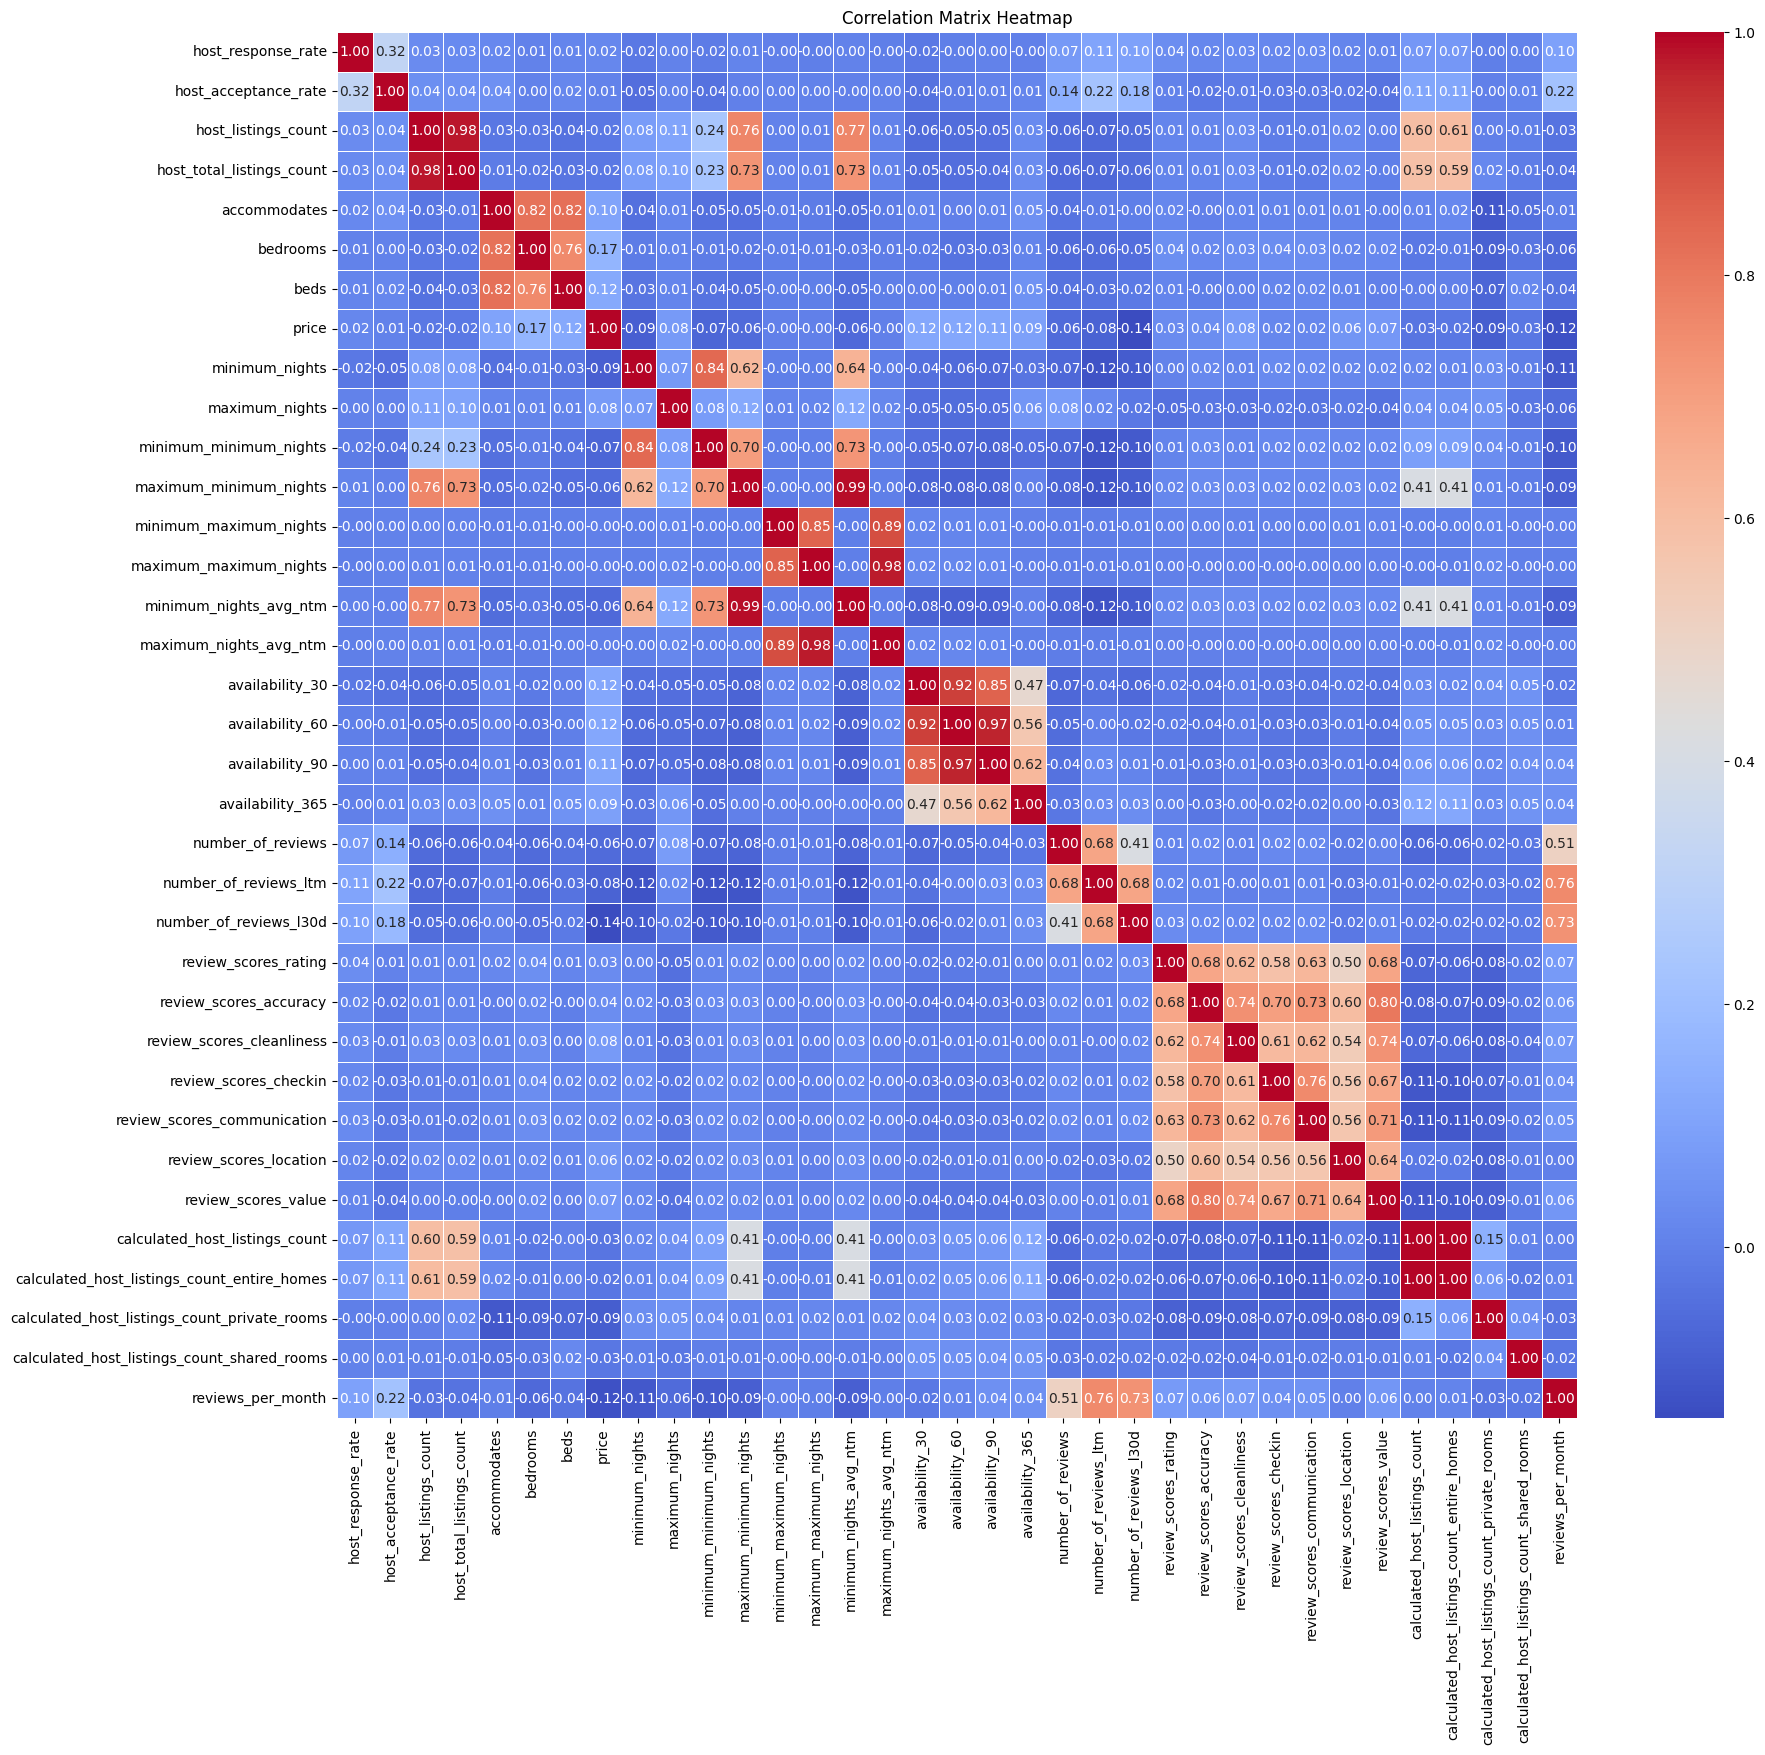

column names having correlation with price greater than 0.2-->
 price


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Correlation Matrix for Numerical and boolean Columns
correlation_matrix = subset_df[numeric_columns].corr()

#Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

corr_cols = correlation_matrix[abs(correlation_matrix['price']) > 0.2].index
for i in corr_cols:
    print("column names having correlation with price greater than 0.2-->\n",i)

In [168]:
#OH encoding on features
prefix_dict = {
    'room_type':'en_room_type_',
    'host_identity_verified':'en_id_ver_',
    'host_response_time':'en_res_time_',
    'host_is_superhost':'en_issuperhost_',
    'has_availability':'en_available_',
    'instant_bookable':'en_bookable_',
    'property_type':'en_prop_type_',
    'host_has_profile_pic':'en_profilepic_'
}
cat_col=list(categorical_columns)
cat_col = [x for x in cat_col if x != 'host_location']
df_encoded = pd.get_dummies(subset_df, prefix=prefix_dict, columns=cat_col)
print(df_encoded)

                     host_location  host_response_rate  host_acceptance_rate   
117133            Bordeaux, France                  94                    99  \
117134            Bordeaux, France                  88                    83   
117135               Paris, France                 100                    95   
117136            Bordeaux, France                 100                   100   
117138            Bordeaux, France                 100                   100   
...                            ...                 ...                   ...   
197125     Cape Town, South Africa                 100                    86   
197126     Cape Town, South Africa                 100                    88   
197127        Benoni, South Africa                 100                   100   
197129  Johannesburg, South Africa                 100                   100   
197130     Cape Town, South Africa                 100                   100   

        host_listings_count  host_total

In [169]:
df_encoded.to_csv("AirBnbupdated.csv",index=True)
df_encoded.head()

,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,...,en_prop_type__Shared room in vacation home,en_prop_type__Shared room in villa,en_prop_type__Shipping container,en_prop_type__Tent,en_prop_type__Tiny home,en_prop_type__Tower,en_prop_type__Treehouse,en_prop_type__Windmill,en_profilepic__f,en_profilepic__t
117133,"Bordeaux, France",94,99,42.0,52.0,12,1.0,6.0,530,1,...,False,False,False,False,False,False,False,False,False,True
117134,"Bordeaux, France",88,83,1.0,3.0,4,2.0,2.0,139,3,...,False,False,False,False,False,False,False,False,False,True
117135,"Paris, France",100,95,2.0,2.0,6,3.0,3.0,450,5,...,False,False,False,False,False,False,False,False,False,True
117136,"Bordeaux, France",100,100,1.0,2.0,4,2.0,2.0,93,3,...,False,False,False,False,False,False,False,False,False,True
117138,"Bordeaux, France",100,100,1.0,1.0,4,1.0,1.0,83,2,...,False,False,False,False,False,False,False,False,False,True


In [170]:
# explore distribution of accommodates.
value_counts = subset_df['accommodates'].value_counts()

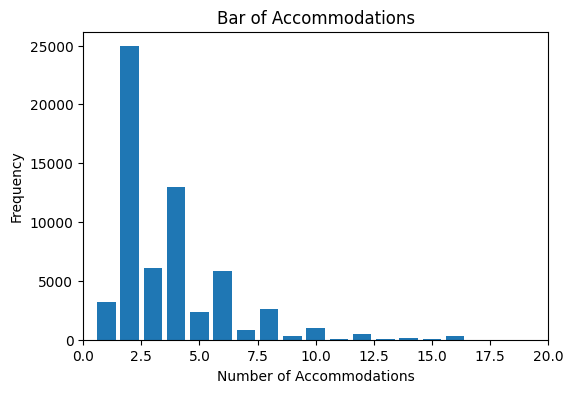

In [171]:
# visualize distribution of accommodates
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Accommodations')
plt.ylabel('Frequency')
plt.title('Bar of Accommodations')
plt.xlim(0, 20)
plt.show()


**As we can see that most of the accomodates are of 1-4 people so now we will go for bed plotting**



In [172]:
# explore distribution of beds
value_counts1 = subset_df['beds'].value_counts()

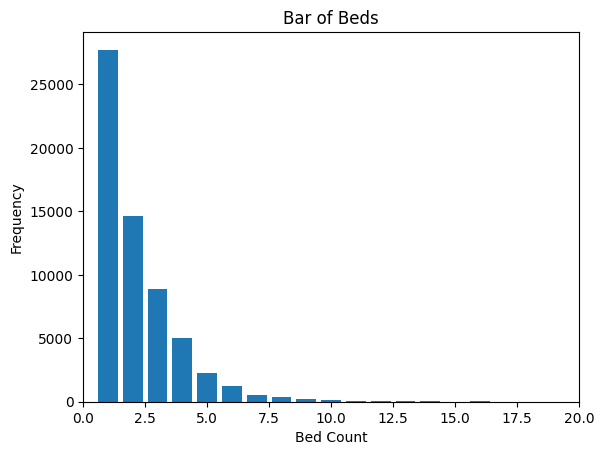

In [173]:
# visualize distribution of beds
import matplotlib.pyplot as plt
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Bar of Beds')
plt.xlim(0, 20)
plt.show()

**Here we can see that mostly single bed rooms are getting purchased**

In [174]:
# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

import matplotlib as plt
import seaborn as sns
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

cols = correlation_matrix[abs(correlation_matrix['price']) > 0.2].index

data = pd.read_csv('FinalAirBnbDataset.csv', usecols=cols, low_memory=False)

ValueError: could not convert string to float: 't'

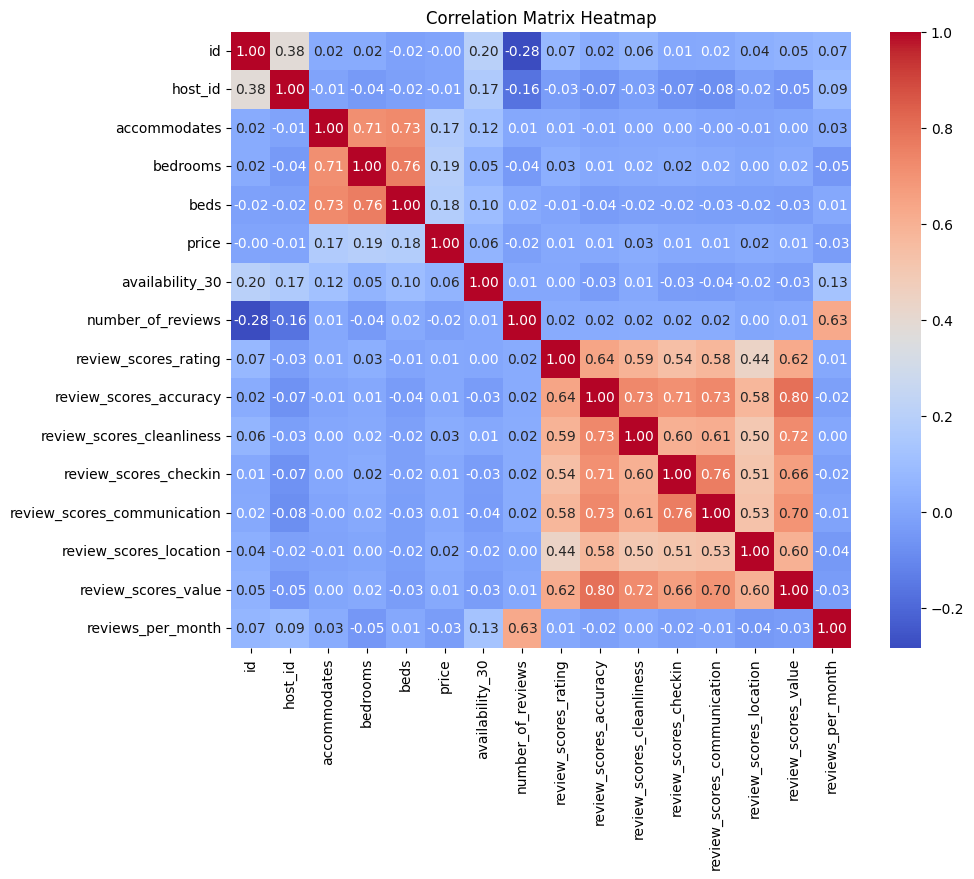

Numeric Columns:
Index(['id', 'host_id', 'accommodates', 'bedrooms', 'beds', 'price',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')
Categorical Columns:
{'minimum_nights', 'room_type', 'host_listings_count', 'has_availability', 'bathrooms', 'property_type'}


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Compute the Correlation Matrix for Numeric Columns
correlation_matrix = data[numeric_columns].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
categorical_columns = set(data.columns) - set(numeric_columns)

print("Numeric Columns:")
print(numeric_columns)

print("Categorical Columns:")
print(categorical_columns)

In [ ]:
#OH Encoding
import pandas as pd
df_encoded = pd.get_dummies(data, columns=categorical_columns, prefix='encoded')
print(df_encoded)

                 id      host_id  accommodates  bedrooms  beds  price  \
0      1.555480e+05     748161.0           3.0       1.0   1.0  200.0   
1      5.060239e+07   60332116.0           4.0       1.0   1.0  170.0   
2      5.060886e+07    3854958.0           4.0       2.0   2.0  354.0   
3      5.060531e+07   44442865.0           3.0       2.0   1.0  240.0   
4      5.033551e+07  405777047.0           4.0       2.0   2.0  317.0   
...             ...          ...           ...       ...   ...    ...   
59997  8.310973e+17  119050270.0           3.0       1.0   1.0  122.0   
59998  8.021704e+17  297860058.0           1.0       1.0   1.0   68.0   
59999  5.841216e+17     814298.0           2.0       1.0   1.0  110.0   
60000  1.317320e+07      38997.0           2.0       1.0   1.0  136.0   
60001  8.755185e+17     799496.0           4.0       1.0   2.0  298.0   

       availability_30  number_of_reviews  review_scores_rating  \
0                  0.0               21.0               

<ipython-input-20-9918247177d4>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_encoded = pd.get_dummies(data, columns=categorical_columns, prefix='encoded')


In [ ]:
#Handling the Outliers using IQR
# Calculate the IQR for each column
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify rows with outliers
outliers = (df_encoded < (Q1 - threshold * IQR)) | (df_encoded > (Q3 + threshold * IQR))

# Remove rows with outliers
df_encoded = df_encoded[~outliers.any(axis=1)]

In [ ]:
#seperating Features and target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
X = df_encoded.loc[:, df_encoded.columns != 'price']
Y = df_encoded['price']
#splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)
# Print the shapes of the train and test sets
print("\nTrain data shape:", X_train.shape, y_train.shape)
print("\nTest data shape:", X_test.shape, y_test.shape)


Train data shape: (1535, 449) (1535,)

Test data shape: (384, 449) (384,)


In [ ]:
# Initialize and fit the preprocessing scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model on the scaled training data
print("\nLR")
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)
y_train_pred =LR_model.predict(X_train_scaled)
y_test_pred =LR_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


LR

Train MSE: 4581.269255439626

Test MSE: 5036.6367335824725

Train R-squared: 0.18582146012899758

Test R-squared: 0.10402727476510254


In [ ]:
from sklearn.linear_model import ElasticNet
# Initialize and train the model on the scaled training data
print("\nElasticNET")
En_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
En_model.fit(X_train_scaled, y_train)
y_train_pred =En_model.predict(X_train_scaled)
y_test_pred =En_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


ElasticNET

Train MSE: 4591.717373552002

Test MSE: 4987.608915346699

Train R-squared: 0.18396463114235073

Test R-squared: 0.11274888607848821


In [ ]:
'''# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()'''

'# visualize distribution of review scores ratings\nplt.hist(data[\'review_scores_rating\'][~data[\'review_scores_rating\'].isnull()])\nplt.title("Histogram of Review Scores Ratings")\nplt.xlabel("Review Score")\nplt.ylabel("Frequency")\nplt.show()'

**Here we can see that the most of the ratings are 4-5 and it is left skewed but we will handle it don't worry at all!**

In [ ]:
'''data['review_scores_rating'] = data['review_scores_rating'].astype(str)
print(data[['review_scores_rating']].dtypes)'''

"data['review_scores_rating'] = data['review_scores_rating'].astype(str)\nprint(data[['review_scores_rating']].dtypes)"

In [ ]:
'''# turn NaN scores with 0 reviews into 'No Reviews'
# Convert the 'column_name' to boolean type
data['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]'''

"# turn NaN scores with 0 reviews into 'No Reviews'\n# Convert the 'column_name' to boolean type\ndata['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))\nidx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()\ndata.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')\n\n# remove inconsistent NaN values\ndata = data[~data['review_scores_rating'].isnull()]"

In [ ]:
'''# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 4 and val <=5:
        return '4-5'
    elif val >= 3 and val <4:
        return '3-3.9'
    elif val >= 2 and val < 3:
        return '2-2.9'
    elif val >= 1 and val < 2:
        return '1-1.9'
    elif val < 1:
        return '0-0.9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print(data[['review_scores_rating']])
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))'''

"# convert review_scores_rating into buckets\ndef convert_scores_buckets(val):\n    if val == 'No Reviews':\n        return 'No Reviews'\n    elif val >= 4 and val <=5:\n        return '4-5'\n    elif val >= 3 and val <4:\n        return '3-3.9'\n    elif val >= 2 and val < 3:\n        return '2-2.9'\n    elif val >= 1 and val < 2:\n        return '1-1.9'\n    elif val < 1:\n        return '0-0.9'\n\ndata['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)\nprint(data[['review_scores_rating']])\nprint('Unique Values in the Column:', np.unique(data['review_scores_rating']))"

In [ ]:
%%shell
jupyter nbconvert --to html //content/AirBnbFinalDemo_v3.ipynb

[NbConvertApp] WARNING | pattern '//content/AirBnbFinalDemo_v3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tr

CalledProcessError: ignored